#### "Fetal Health Classification from Cardiotocographic Data using Machine Learning Models"
#### Berta Duran Arqué (https://github.com/bduar)
#### October 2022
#### Notebook 4/4

# 4 - Models' performance evaluation and interpretation

In [1]:
# Dependencies
import numpy as np
import pandas as pd

import joblib

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_validate, cross_val_score, StratifiedKFold

from matplotlib import pyplot as plt

In [4]:
# Load saved models and datasets
best_models = joblib.load("./models/fitted_grids_third.sav")
datasets_dict = joblib.load("./models/datasets_dict.sav")

### 4.1 - Performance and interpretation of the Random Forest for the CLASS classifier

In [26]:
# Retrieving the best Random Forest for the CLASS classifier and the dataset
rf_CLASS = best_models["raw_CLASS"]["model"]
X_train, X_test, y_train, y_test = datasets_dict["raw_CLASS"][0], datasets_dict["raw_CLASS"][1], datasets_dict["raw_CLASS"][2], datasets_dict["raw_CLASS"][3]

rf_CLASS

RandomForestClassifier(criterion='entropy', max_depth=17, min_samples_leaf=2,
                       min_samples_split=3, n_jobs=-1)

#### Cross-validated performance metrics

The first thing we will look at are cross-validated performance metrics. These metrics are calculated multiple times on the test dataset using different splits. These should be more robust than a single non-cross validated performance measurement.
The cross-validated metrics will be returned in a dictionary and we can obtain their mean and standard deviation for ease of interpretaion.

In [64]:
scoring = {'accuracy', 'precision_macro', 'recall_macro', 'f1_macro'}

kfold = StratifiedKFold(n_splits = 5)
scores = cross_validate(rf_CLASS, X_test, y_test, scoring=scoring, cv=kfold)

for element in scores:
    print(f"{element}: {scores[element].round(4)}\n Mean: {scores[element].mean().round(4)}\n Stdev: {scores[element].std().round(4)}")

fit_time: [0.9817 0.0391 0.039  0.0416 0.0384]
 Mean: 0.228
 Stdev: 0.3769
score_time: [0.0097 0.0073 0.007  0.0072 0.0069]
 Mean: 0.0076
 Stdev: 0.0011
test_recall_macro: [0.8633 0.7722 0.7738 0.7816 0.8482]
 Mean: 0.8078
 Stdev: 0.0396
test_f1_macro: [0.8958 0.8347 0.8439 0.8297 0.8802]
 Mean: 0.8568
 Stdev: 0.0263
test_precision_macro: [0.9402 0.9306 0.9667 0.9072 0.9185]
 Mean: 0.9326
 Stdev: 0.0203
test_accuracy: [0.9531 0.9219 0.9141 0.9134 0.9213]
 Mean: 0.9247
 Stdev: 0.0146


#### Classification report

Similarly, we can produce a classification report that will summarize most of the performance metrics, including per-class precision, recall and F1 score.

In [48]:
y_pred = rf_CLASS.predict(X_test)
#y_pred # To check the prediction

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       118
           1       0.89      0.95      0.92       169
           2       0.71      0.71      0.71        17
           3       1.00      0.62      0.77        24
           4       0.85      0.46      0.59        24
           5       0.94      0.97      0.95        93
           6       0.92      0.99      0.95        80
           7       1.00      0.92      0.96        25
           8       0.87      0.87      0.87        15
           9       0.93      0.89      0.91        73

    accuracy                           0.90       638
   macro avg       0.90      0.83      0.85       638
weighted avg       0.90      0.90      0.90       638



We can see that we have good scores in most categories. Perhaps class 4 stands out due to bad recall and F1 scores, but it is also one of the smaller categories, so a bigger error would be expected.

#### Confusion matrix

The confusion matrix provides a graphical interpretation of the results in the classification report. We can see true positives (diagonal)

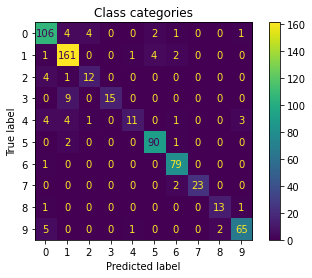

In [52]:
cm = confusion_matrix(y_test, y_pred, labels=rf_CLASS.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_CLASS.classes_)
disp.plot()
plt.title("Class categories")
plt.show()

#### Feature importance

Last, feature importance aims at providing interpretability to the model. We can obtain the relative contributions of the different variables to the model decision directly from the model object.

In [53]:
# Feature importance of the random forest model
feature_importance_CLASS = pd.DataFrame()

feature_importance_CLASS['variable'] = datasets_dict["raw_CLASS"][0].columns
feature_importance_CLASS['importance'] = rf_CLASS.feature_importances_

# Feature_importance values in descending order
feature_importance_CLASS = feature_importance_CLASS.sort_values(by='importance', ascending=False)
feature_importance_CLASS.head(10)

,variable,importance
1,AC,0.211704
8,DL,0.128225
17,Variance,0.111854
5,MSTV,0.073664
4,ASTV,0.068907
12,Min,0.056596
16,Median,0.055567
7,MLTV,0.047760
6,ALTV,0.046600
11,Width,0.042967


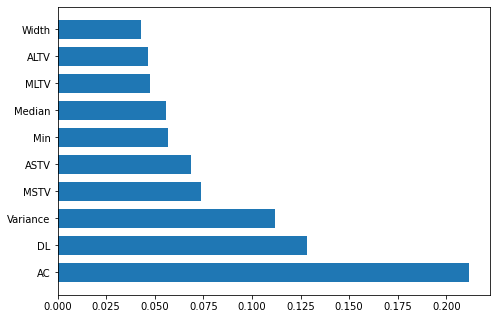

In [74]:
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])
ax.barh(feature_importance_CLASS["variable"][0:10], feature_importance_CLASS["importance"][0:10], height = .7)
plt.show()

Where AC is the number of accelerations per second, DL the number of light decelerations per second and variance is the histograms' variance.

### 4.2 - Performance and interpretation of the Random Forest for the NSP classifier

We will apply the same metrics to the NSP classification.

In [63]:
rf_NSP = best_models["raw_NSP"]["model"]
X_train, X_test, y_train, y_test = datasets_dict["raw_NSP"][0], datasets_dict["raw_NSP"][1], datasets_dict["raw_NSP"][2], datasets_dict["raw_NSP"][3]

rf_NSP

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       min_samples_split=3, n_jobs=-1)

#### Multiple metrics with cross-validation

In [65]:
scoring = {'accuracy', 'precision_macro', 'recall_macro', 'f1_macro'}

kfold = StratifiedKFold(n_splits=5)
scores = cross_validate(rf_CLASS, X_test, y_test, scoring=scoring, cv=kfold)

for element in scores:
    print(f"{element}: {scores[element].round(4)}\n Mean: {scores[element].mean().round(4)}\n Stdev: {scores[element].std().round(4)}")

fit_time: [0.0745 0.0387 0.0386 0.0378 0.0393]
 Mean: 0.0458
 Stdev: 0.0144
score_time: [0.0081 0.0074 0.0073 0.0071 0.0067]
 Mean: 0.0073
 Stdev: 0.0005
test_recall_macro: [0.8633 0.7722 0.7579 0.7816 0.8482]
 Mean: 0.8047
 Stdev: 0.0427
test_f1_macro: [0.8958 0.8347 0.8292 0.8297 0.8802]
 Mean: 0.8539
 Stdev: 0.0283
test_precision_macro: [0.9402 0.9306 0.964  0.9072 0.9185]
 Mean: 0.9321
 Stdev: 0.0194
test_accuracy: [0.9531 0.9219 0.9062 0.9134 0.9213]
 Mean: 0.9232
 Stdev: 0.016


#### Classification report

In [66]:
y_pred = rf_NSP.predict(X_test)
#y_pred

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       496
           1       0.91      0.79      0.85       101
           2       1.00      0.93      0.96        41

    accuracy                           0.95       638
   macro avg       0.95      0.90      0.93       638
weighted avg       0.95      0.95      0.95       638



#### Confusion matrix

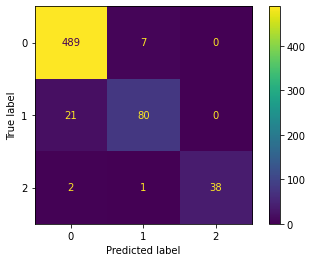

In [68]:
cm = confusion_matrix(y_test, y_pred, labels=rf_NSP.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_NSP.classes_)
disp.plot()
plt.show()

#### Feature importance

In [70]:
feature_importance_NSP = pd.DataFrame()

feature_importance_NSP['variable'] = datasets_dict["raw_NSP"][0].columns
feature_importance_NSP['importance'] = rf_NSP.feature_importances_

# feature_importance values in descending order
feature_importance_NSP = feature_importance_NSP.sort_values(by='importance', ascending=False)
feature_importance_NSP.head(10)

,variable,importance
4,ASTV,0.150498
5,MSTV,0.110736
6,ALTV,0.098861
16,Median,0.098515
1,AC,0.097836
10,DP,0.066922
7,MLTV,0.061220
0,LB,0.055830
17,Variance,0.050129
3,UC,0.040915


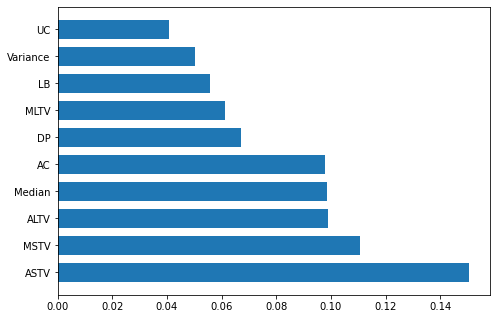

In [73]:
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])
ax.barh(feature_importance_NSP["variable"][0:10], feature_importance_NSP["importance"][0:10], height = .7)
plt.show()

In the prediction of the NSP categories, unlike with Class, the most important variables are those related to long term variability: ASTV, percentage of time with abnormal short term variability; MSTV, mean value of short term variability and ALTV, percentage of time with abnormal long term variability.